## Promedio, moda y mediana

In [51]:
import pandas as pd
import math
from collections import defaultdict
from src.utils.helpers import convert_to_numeric_types

df = pd.read_csv('../data/raw/spotify_most_streamed_songs.csv', delimiter=",")

convert_to_numeric_types(df, pd)
df.dropna(axis=0)
sample = df['streams'].tolist()
sample_2 = [int(x) for x in sample if not math.isnan(x)]

mean = sum(sample_2) / len(sample_2)
print('El promedio es: ',mean)

def median(values):
    ordered_values = sorted(values)
    quant = len(ordered_values)
    if quant % 2 != 0:
        return ordered_values[int(quant / 2) - 1]
    else:
        return (ordered_values[int(quant / 2) - 1] + ordered_values[int(quant / 2)]) / 2.0

print("La mediana es: ", median(sample_2))

def mode(values):
    counts = defaultdict(lambda:0)

    for s in values:
        counts[s] += 1

    max_count = max(counts.values())
    modes = [v for v in set(values) if counts[v] == max_count]
    return modes

print('Las modas son: ', mode(sample_2))


El promedio es:  514137424.93907565
La mediana es:  290530915.0
Las modas son:  [723894473, 156338624, 395591396, 1223481149]


Observando la diferencia entre la mediana y el promedio, entiendo que hay datos atipicos que necesitan ser limpiados.

In [ ]:
# Distribución normal, devuelve probabilidad
import math

def normal_pdf(x: float, mean: float, std_dev: float) -> float:
    return (1.0 / (2.0 * math.pi * std_dev ** 2) ** 0.5) * math.exp(-1.0 * ((x - mean) ** 2 / (2.0 * std_dev ** 2)))

## Histogramas

In [ ]:
# otra cosa


## Matriz de correlación
Para calcular nuestra matriz de correlacion, lo que hicimos fue tomar la base de datos, convertir a valores numericos aquellos campos que no fueran de este tipo y por ultimo eliminar aquellas columnas las cuales fueran todas NaN.
Una vez que 'limpiamos' la base de datos, dibujamos la matriz.

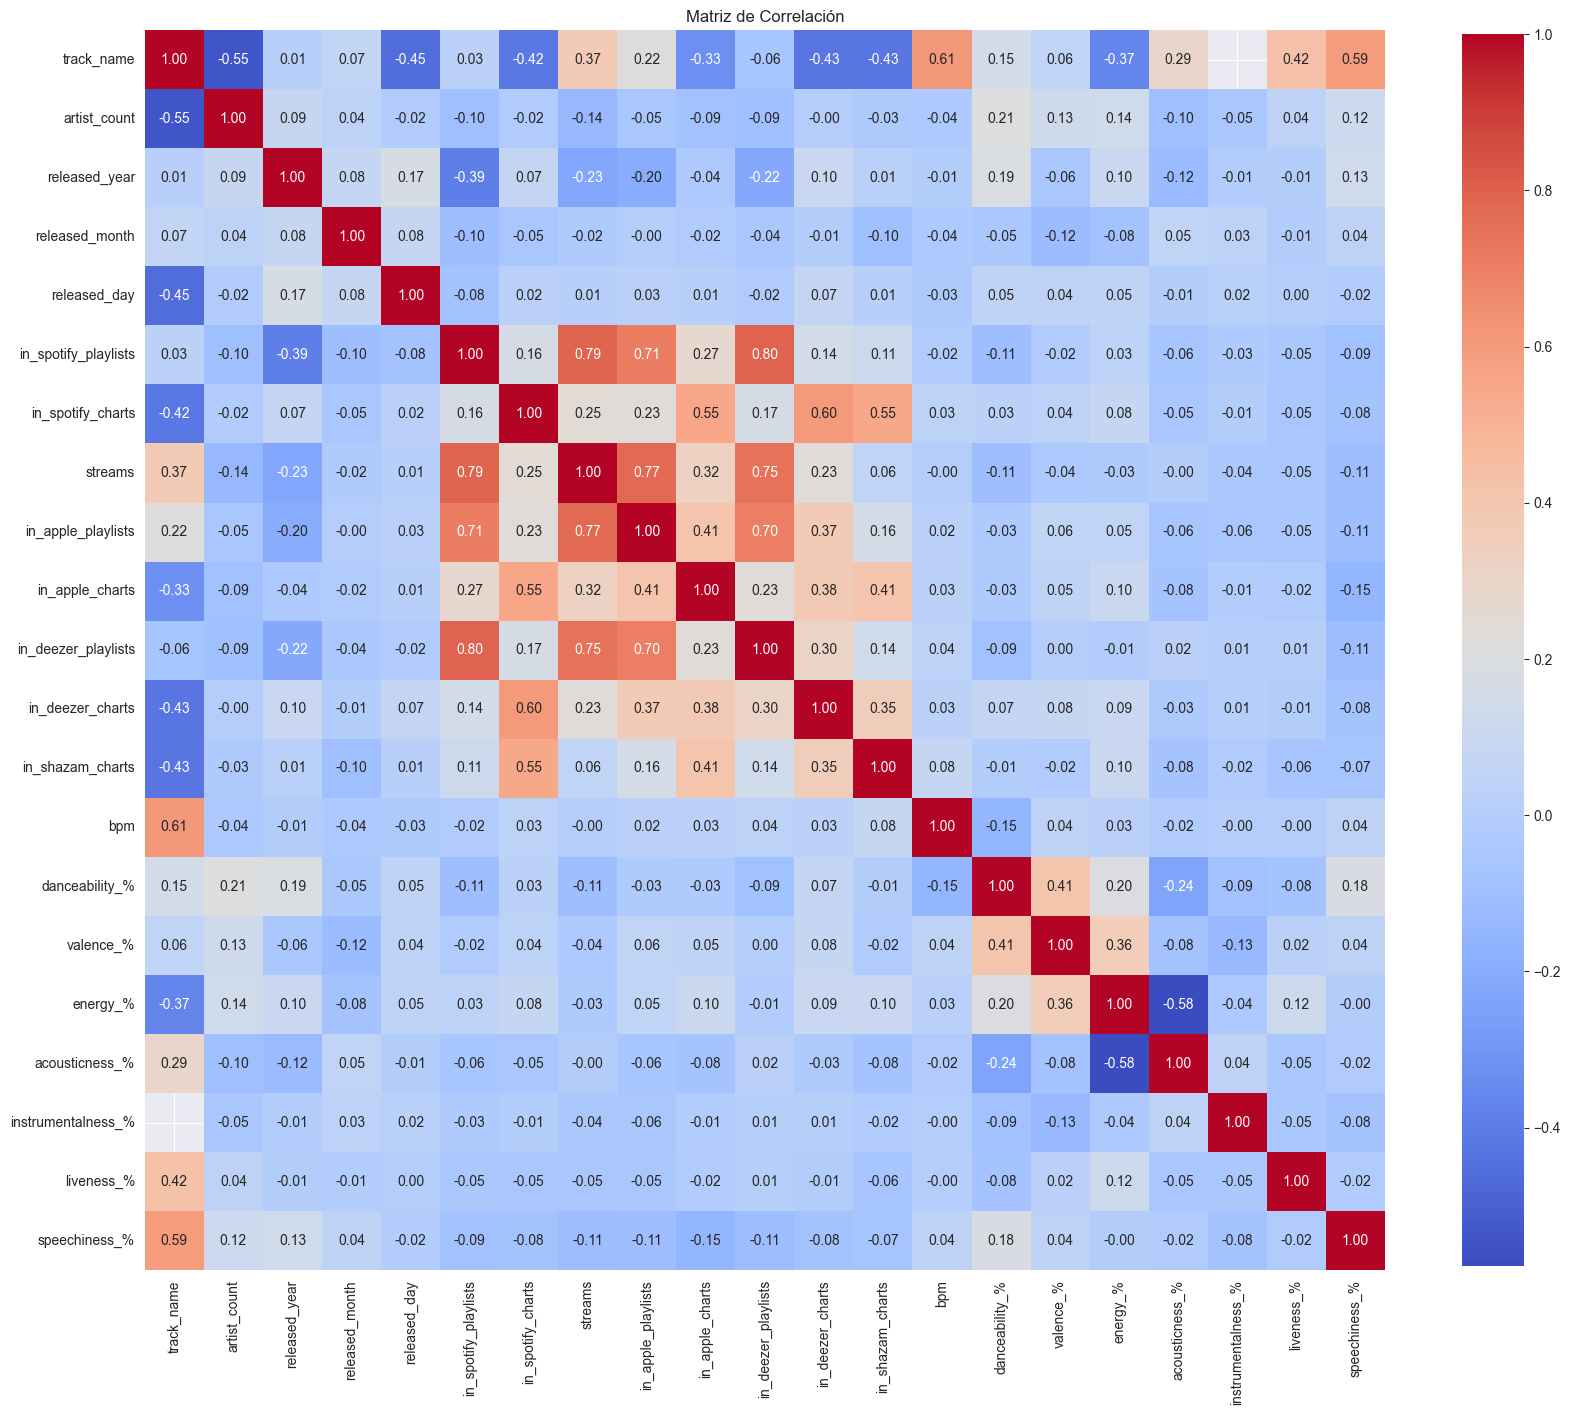

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

df_cleaned = df.dropna(axis=1, how='all')

correlations = df_cleaned.corr(method='pearson')

plt.figure(figsize=(20, 20))

sns.heatmap(correlations, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Matriz de Correlación')
plt.show()
